In [1]:

import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt   
import matplotlib.style as plt_style
plt.style.use('classic')

import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
# import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
# from imblearn.over_sampling import RandomOverSampler  # 
# from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
# from imblearn.over_sampling import SMOTE,ADASYN

In [2]:
df = pd.read_csv("./../../Dataset/US_Heart_Patients_2.csv")

In [3]:
df.head()

Gender   age  education  currentSmoker  cigsPerDay  BP Meds  \
0    Male  39.0        4.0            0.0         0.0      0.0   
1  Female  46.0        2.0            0.0         0.0      0.0   
2    Male  48.0        1.0            1.0        20.0      0.0   
3  Female  61.0        3.0            1.0        30.0      0.0   
4  Female  46.0        3.0            1.0        23.0      0.0   

   prevalentStroke  prevalentHyp  diabetes  tot cholesterol  ...    BMI  \
0              0.0           0.0       0.0            195.0  ...  26.97   
1              0.0           0.0       0.0            250.0  ...  28.73   
2              0.0           0.0       0.0            245.0  ...  25.34   
3              0.0           1.0       0.0            225.0  ...  28.58   
4              0.0           0.0       0.0            285.0  ...  23.10   

   heartRate  glucose  Heart-Att  Unnamed: 16  Unnamed: 17  Unnamed: 18  \
0       80.0     77.0          0          NaN          NaN          NaN   
1       95.0     76.0          0          NaN          NaN          NaN   
2       75.0     70.0          0          NaN          NaN          NaN   
3       65.0    103.0          1          NaN          NaN          NaN   
4       85.0     85.0          0          NaN          NaN          NaN   

   Unnamed: 19  Unnamed: 20  Unnamed: 21  
0          NaN          NaN          NaN  
1          NaN          NaN          NaN  
2          NaN          NaN          NaN  
3          NaN          NaN          NaN  
4          NaN          NaN          NaN  

[5 rows x 22 columns]

In [4]:
cols = df.columns

In [5]:
# Delete all the unnamed columns
for i in range(16, len(cols)):
    df.drop(columns = cols[i], axis = 1, inplace = True)

In [6]:
df.head()

Gender   age  education  currentSmoker  cigsPerDay  BP Meds  \
0    Male  39.0        4.0            0.0         0.0      0.0   
1  Female  46.0        2.0            0.0         0.0      0.0   
2    Male  48.0        1.0            1.0        20.0      0.0   
3  Female  61.0        3.0            1.0        30.0      0.0   
4  Female  46.0        3.0            1.0        23.0      0.0   

   prevalentStroke  prevalentHyp  diabetes  tot cholesterol  Systolic BP  \
0              0.0           0.0       0.0            195.0        106.0   
1              0.0           0.0       0.0            250.0        121.0   
2              0.0           0.0       0.0            245.0        127.5   
3              0.0           1.0       0.0            225.0        150.0   
4              0.0           0.0       0.0            285.0        130.0   

   Diastolic BP    BMI  heartRate  glucose  Heart-Att  
0          70.0  26.97       80.0     77.0          0  
1          81.0  28.73       95.0     76.0          0  
2          80.0  25.34       75.0     70.0          0  
3          95.0  28.58       65.0    103.0          1  
4          84.0  23.10       85.0     85.0          0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4232 non-null   object 
 1   age              4238 non-null   float64
 2   education        4130 non-null   float64
 3   currentSmoker    4237 non-null   float64
 4   cigsPerDay       4209 non-null   float64
 5   BP Meds          4180 non-null   float64
 6   prevalentStroke  4231 non-null   float64
 7   prevalentHyp     4238 non-null   float64
 8   diabetes         4238 non-null   float64
 9   tot cholesterol  4180 non-null   float64
 10  Systolic BP      4236 non-null   float64
 11  Diastolic BP     4235 non-null   float64
 12  BMI              4216 non-null   float64
 13  heartRate        4236 non-null   float64
 14  glucose          3849 non-null   float64
 15  Heart-Att        4240 non-null   int64  
dtypes: float64(14), int64(1), object(1)
memory usage: 530.1+ KB


In [8]:
df.isnull().sum()

Gender               8
age                  2
education          110
currentSmoker        3
cigsPerDay          31
BP Meds             60
prevalentStroke      9
prevalentHyp         2
diabetes             2
tot cholesterol     60
Systolic BP          4
Diastolic BP         5
BMI                 24
heartRate            4
glucose            391
Heart-Att            0
dtype: int64

In [9]:
cat = ['education','currentSmoker','BP Meds','prevalentStroke','prevalentHyp','diabetes','Gender']
num = ['age','cigsPerDay','tot cholesterol','Systolic BP','Diastolic BP','BMI','heartRate','glucose']

In [10]:
# null value treatment
for col in num:
    val = df[col].mean()
    df[col].fillna(val, inplace = True)

In [11]:
for col in cat:
    val = df[col].mode()[0]
    df[col].fillna(val, inplace = True)

In [12]:
cols = df.columns
for i in range(16, len(cols)):
    df.drop(columns = cols[i], axis = 1, inplace = True)

In [13]:
df[num[0]].mode()[0]

40.0

In [ ]:
df

Gender   age  education  currentSmoker  cigsPerDay  BP Meds  \
0       Male  39.0        4.0            0.0         0.0      0.0   
1     Female  46.0        2.0            0.0         0.0      0.0   
2       Male  48.0        1.0            1.0        20.0      0.0   
3     Female  61.0        3.0            1.0        30.0      0.0   
4     Female  46.0        3.0            1.0        23.0      0.0   
...      ...   ...        ...            ...         ...      ...   
4235  Female  48.0        2.0            1.0        20.0      0.0   
4236  Female  44.0        1.0            1.0        15.0      0.0   
4237  Female  52.0        2.0            0.0         0.0      0.0   
4238    Male  40.0        3.0            0.0         0.0      0.0   
4239  Female  39.0        3.0            1.0        30.0      0.0   

      prevalentStroke  prevalentHyp  diabetes  tot cholesterol  Systolic BP  \
0                 0.0           0.0       0.0            195.0        106.0   
1                 0.0           0.0       0.0            250.0        121.0   
2                 0.0           0.0       0.0            245.0        127.5   
3                 0.0           1.0       0.0            225.0        150.0   
4                 0.0           0.0       0.0            285.0        130.0   
...               ...           ...       ...              ...          ...   
4235              0.0           0.0       0.0            248.0        131.0   
4236              0.0           0.0       0.0            210.0        126.5   
4237              0.0           0.0       0.0            269.0        133.5   
4238              0.0           1.0       0.0            185.0        141.0   
4239              0.0           0.0       0.0            196.0        133.0   

      Diastolic BP    BMI  heartRate     glucose  Heart-Att  
0             70.0  26.97       80.0   77.000000          0  
1             81.0  28.73       95.0   76.000000          0  
2             80.0  25.34       75.0   70.000000          0  
3             95.0  28.58       65.0  103.000000          1  
4             84.0  23.10       85.0   85.000000          0  
...            ...    ...        ...         ...        ...  
4235          72.0  22.00       84.0   86.000000          0  
4236          87.0  19.16       86.0   81.951936          0  
4237          83.0  21.47       80.0  107.000000          0  
4238          98.0  25.60       67.0   72.000000          0  
4239          86.0  20.91       85.0   80.000000          0  

[4240 rows x 16 columns]

In [ ]:
round(df.describe().T, 2)

count    mean    std     min     25%     50%     75%    max
age              4240.0   49.58   8.57   32.00   42.00   49.00   56.00   70.0
education        4240.0    1.95   1.02    1.00    1.00    2.00    3.00    4.0
currentSmoker    4240.0    0.49   0.50    0.00    0.00    0.00    1.00    1.0
cigsPerDay       4240.0    9.00  11.88    0.00    0.00    0.00   20.00   70.0
BP Meds          4240.0    0.03   0.17    0.00    0.00    0.00    0.00    1.0
prevalentStroke  4240.0    0.01   0.08    0.00    0.00    0.00    0.00    1.0
prevalentHyp     4240.0    0.31   0.46    0.00    0.00    0.00    1.00    1.0
diabetes         4240.0    0.03   0.16    0.00    0.00    0.00    0.00    1.0
tot cholesterol  4240.0  236.68  44.30  107.00  206.00  234.00  262.00  696.0
Systolic BP      4240.0  132.36  22.03   83.50  117.00  128.00  144.00  295.0
Diastolic BP     4240.0   82.90  11.91   48.00   75.00   82.00   89.62  142.5
BMI              4240.0   25.80   4.06   15.54   23.08   25.42   28.02   56.8
heartRate        4240.0   75.87  11.99   44.00   68.00   75.00   83.00  143.0
glucose          4240.0   81.95  22.83   40.00   72.00   80.00   85.00  394.0
Heart-Att        4240.0    0.15   0.36    0.00    0.00    0.00    0.00    1.0

### outlier treatment

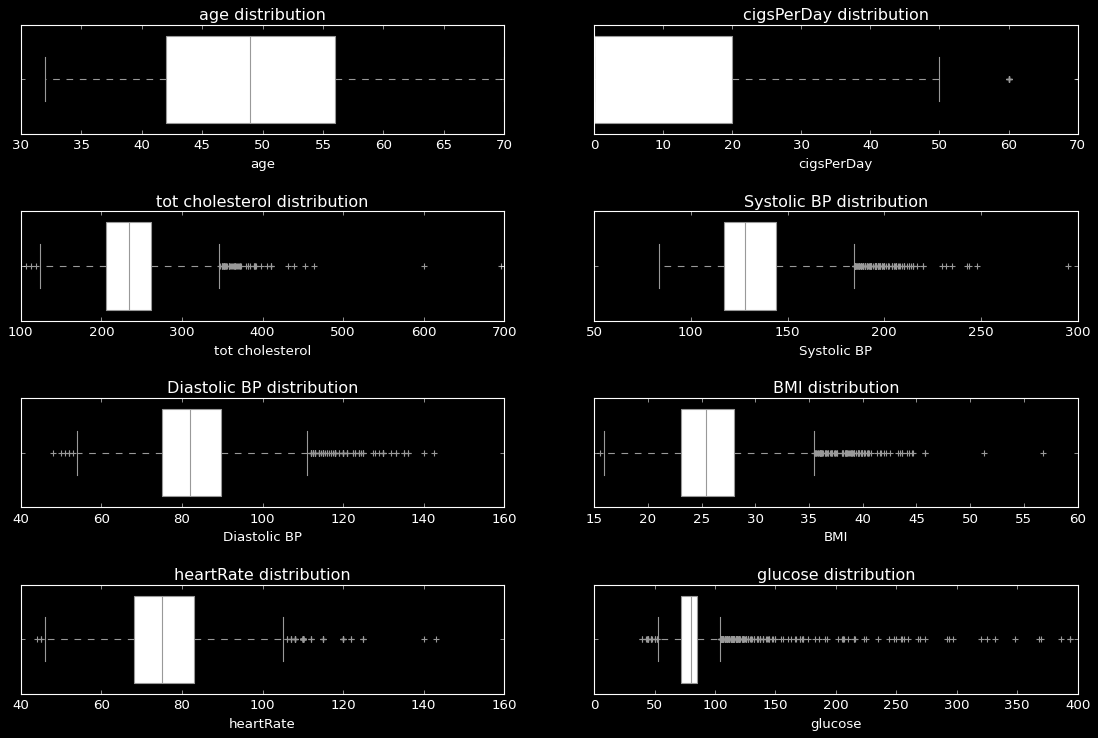

In [16]:
# ------- Box Plot 
plt.style.use("dark_background")
fig, axes = plt.subplots(nrows = 4, ncols = 2)
fig.set_figheight(10)
fig.set_figwidth(15)
plt.tight_layout(pad=4)

j = 0
for i in range(4):
    a = sns.boxplot(df[num[j]], color="white", ax = axes[i][0], orient = 'h')
    a.set_title(f"{num[j]} distribution")
    b = sns.boxplot(df[num[j + 1]], color="white", ax = axes[i][1], orient = 'h')
    b.set_title(f"{num[j + 1]} distribution")
    j += 2

## Outlier Removing

In [17]:
def ub_and_lb(col):
    sorted(col)
    quartile_1, quartile_3 = np.percentile(col, [25, 75])
    inter_quartile_range = quartile_3 - quartile_1
    upper_bound = quartile_3 + 1.5 * inter_quartile_range
    lower_bound = quartile_1 - 1.5 * inter_quartile_range
    return upper_bound, lower_bound

In [18]:
for col in num:
    ub, lb = ub_and_lb(df[col])
    
    df[col] = np.where(
        df[col] > ub, ub, df[col]
    ) 
    df[col] = np.where(
        df[col] < lb, lb, df[col]
    ) 

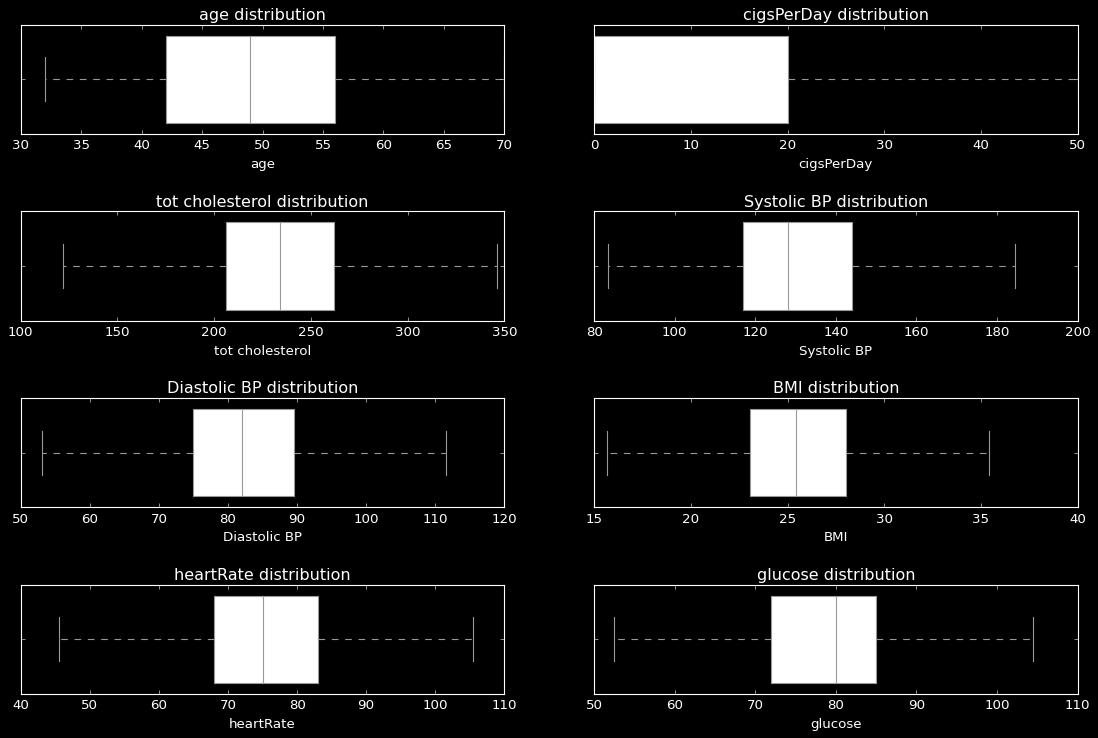

In [19]:

plt.style.use("dark_background")
fig, axes = plt.subplots(nrows = 4, ncols = 2)
fig.set_figheight(10)
fig.set_figwidth(15)
plt.tight_layout(pad=4)

j = 0
for i in range(4):
    a = sns.boxplot(df[num[j]], color="white", ax = axes[i][0], orient = 'h')
    a.set_title(f"{num[j]} distribution")
    b = sns.boxplot(df[num[j + 1]], color="white", ax = axes[i][1], orient = 'h')
    b.set_title(f"{num[j + 1]} distribution")
    j += 2

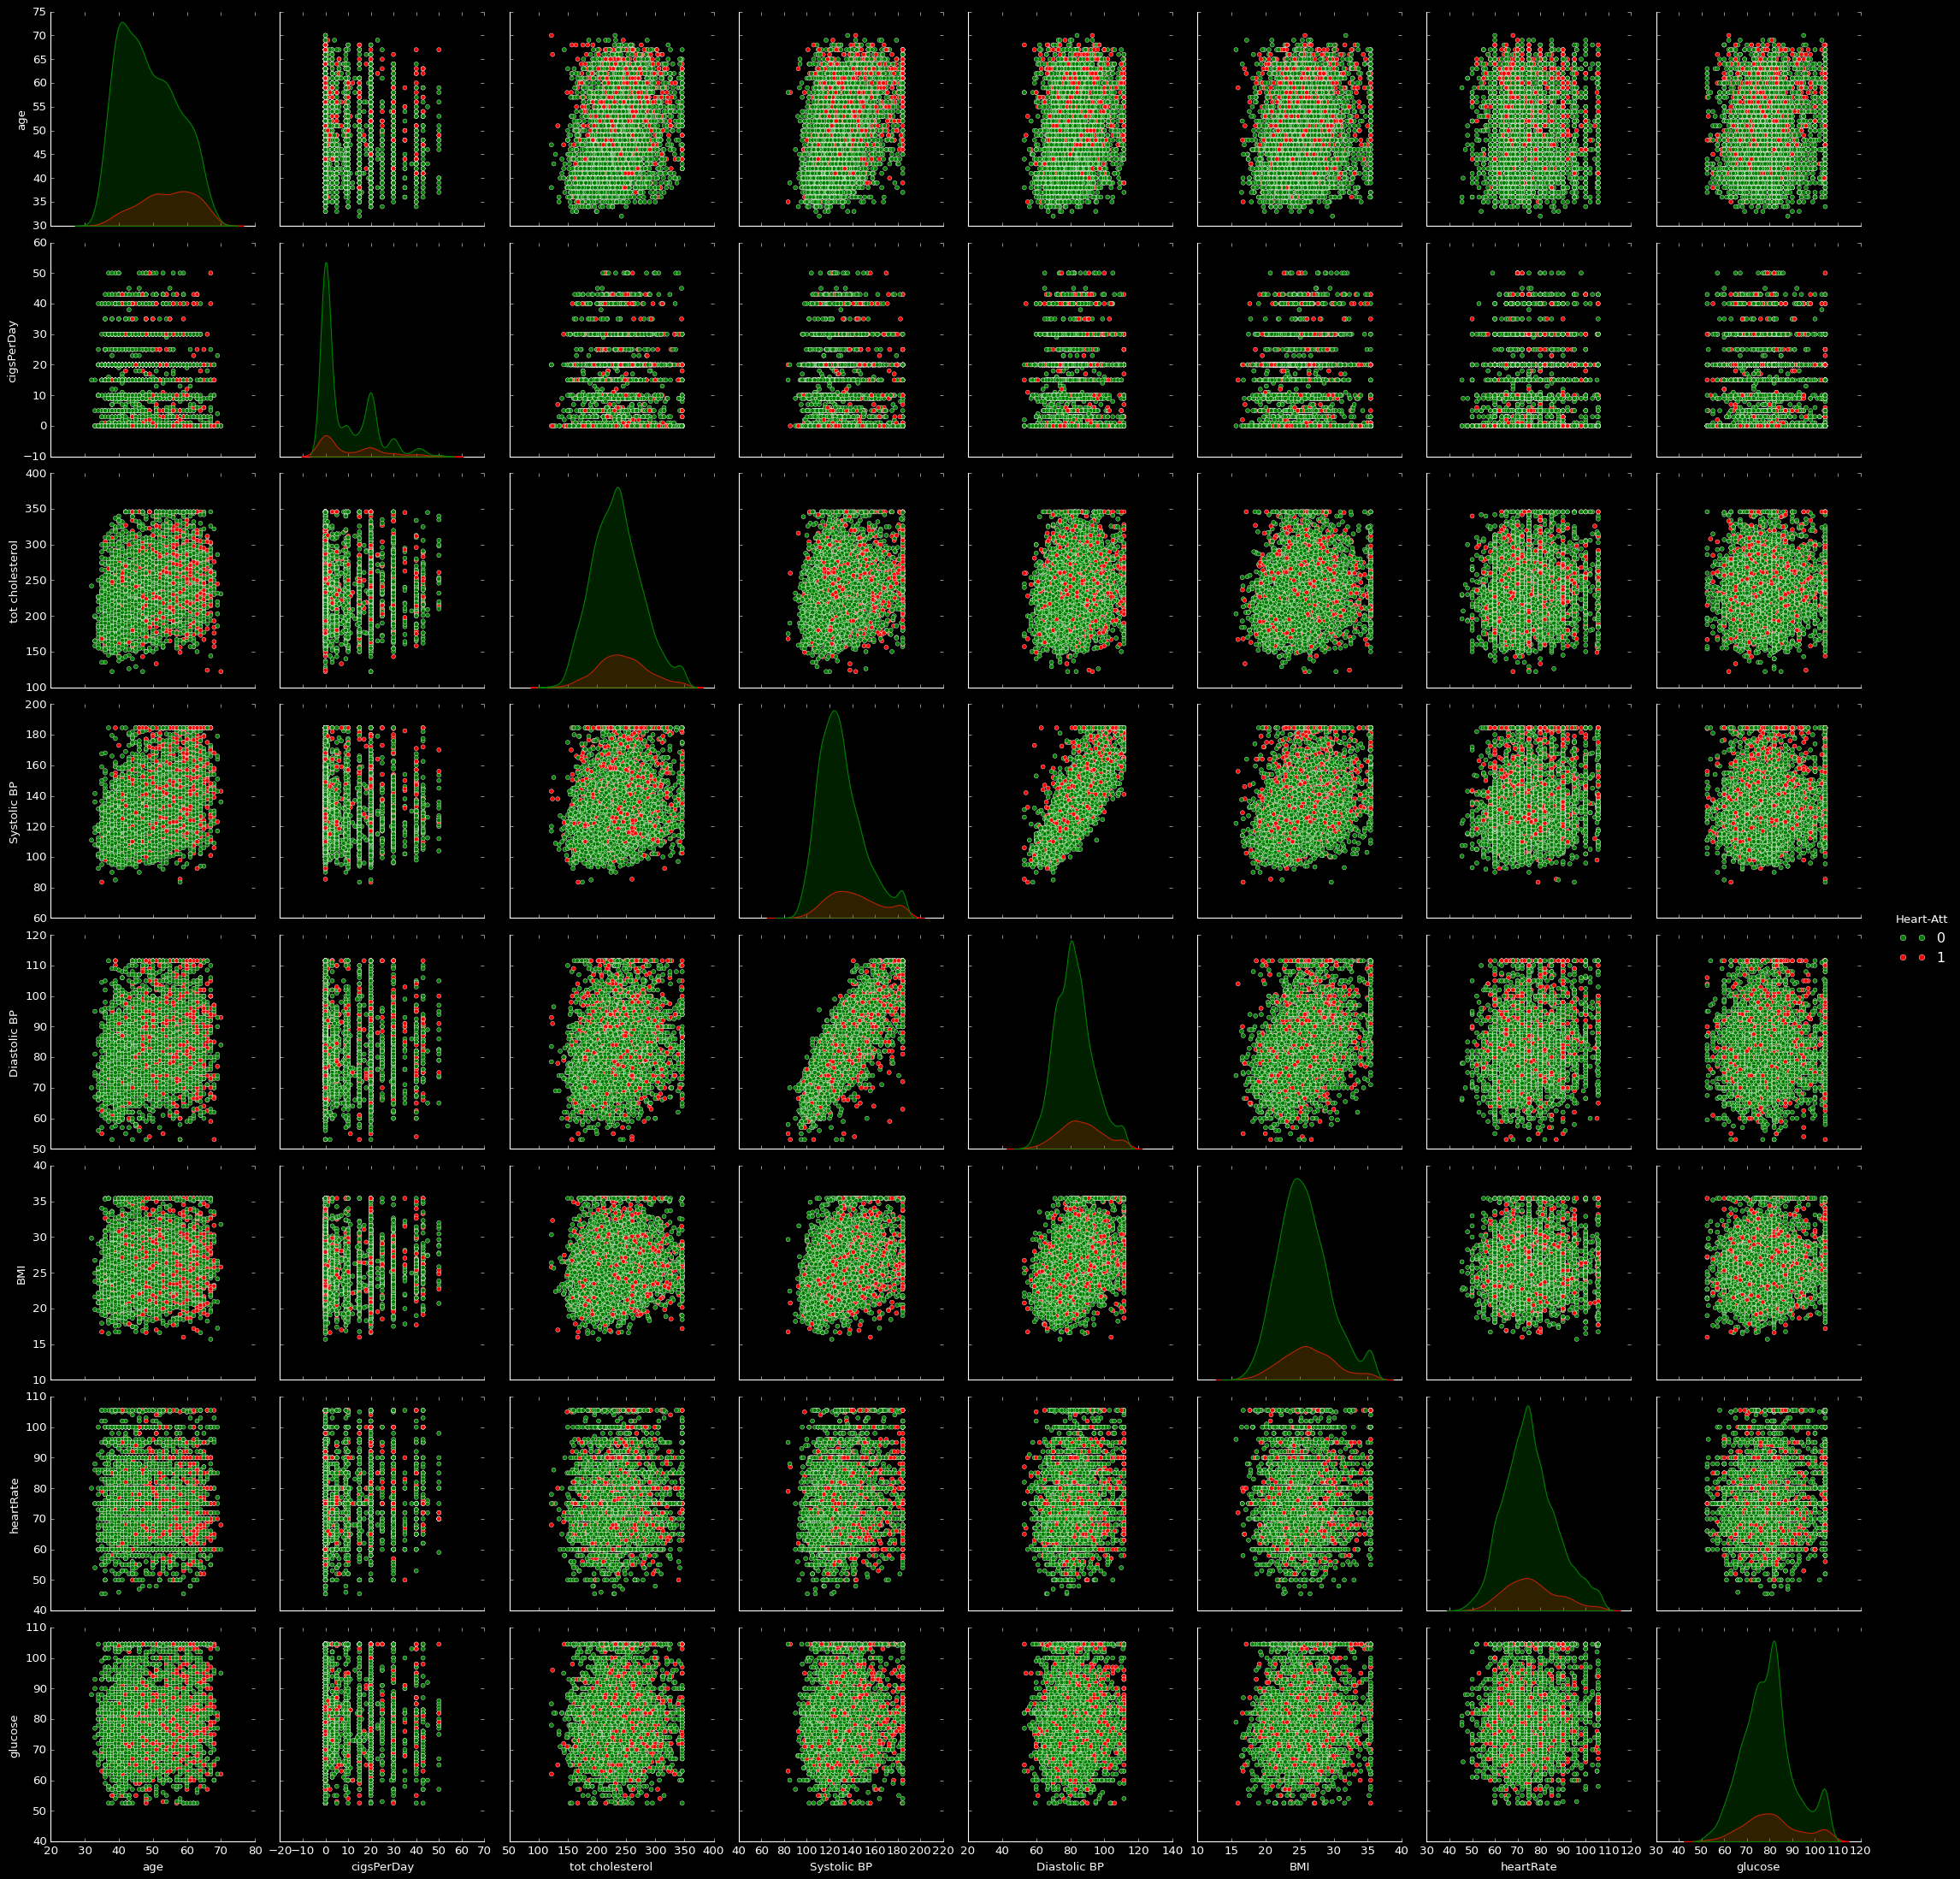

In [20]:
num.append("Heart-Att")

sns.pairplot(df[num],
            height = 3.5,
            aspect = 1,
            hue = 'Heart-Att',
            palette = {'green', 'red'})

In [21]:
# replace male with 0 and female with 1

df["Gender"] = np.where(
    df["Gender"] == "Male", 0, 1
)
# or 
# df["Gender"].replace(to_replace = ["Male", "Female"], value = [0, 1], inplace = True)


<Axes: >

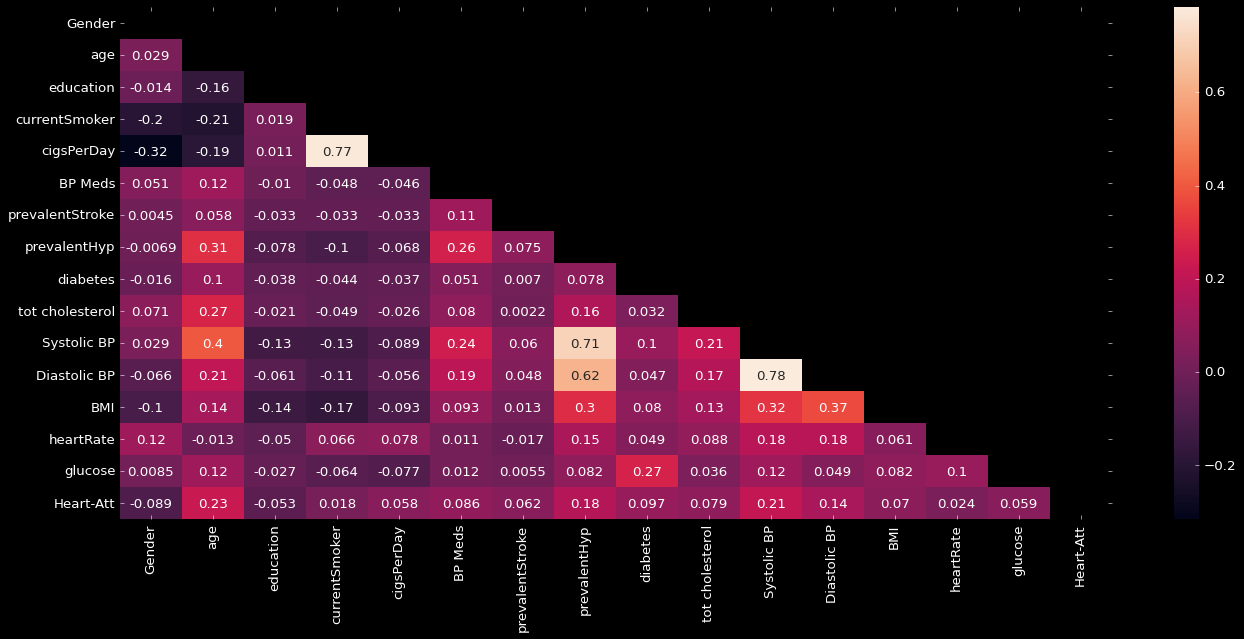

In [22]:
plt.figure(figsize = (20, 8))
corr_matrix = df.corr()
mask_ut = np.triu(np.ones_like(corr_matrix, dtype = bool))
sns.heatmap(corr_matrix, annot = True, mask = mask_ut)

##### 1. Logistic Regression

- Logistic regression is defined as a supervised machine learning algorithm that accomplishes binary classification tasks by predicting the probability of an outcome, event, or observation. 
- The model delivers a binary or dichotomous outcome limited to two possible outcomes: yes/no, 0/1, or true/false.
- Logistic regression uses a logistic function called a sigmoid function to map predictions and their probabilities. 
- The sigmoid function refers to an S-shaped curve that converts any real value to a range between 0 and 1.

> Moreover, if the output of the sigmoid function (estimated probability) is greater than a predefined threshold on the graph, the model predicts that the instance belongs to that class. If the estimated probability is less than the predefined threshold, the model predicts that the instance does not belong to the class.

Sigmoid function :  
$$f(x) = \frac{1}{1 + e^{-x}}$$

<p align="center">
    <img src="./../public/image/sigmoid.png" width=980px>
</p>

In [23]:
original_data = df.copy()

In [24]:
df.drop(columns = ["diabetes", "currentSmoker", "Diastolic BP"], axis = 1, inplace = True)

In [ ]:
df.head()

Gender   age  education  cigsPerDay  BP Meds  prevalentStroke  \
0       0  39.0        4.0         0.0      0.0              0.0   
1       1  46.0        2.0         0.0      0.0              0.0   
2       0  48.0        1.0        20.0      0.0              0.0   
3       1  61.0        3.0        30.0      0.0              0.0   
4       1  46.0        3.0        23.0      0.0              0.0   

   prevalentHyp  tot cholesterol  Systolic BP    BMI  heartRate  glucose  \
0           0.0            195.0        106.0  26.97       80.0     77.0   
1           0.0            250.0        121.0  28.73       95.0     76.0   
2           0.0            245.0        127.5  25.34       75.0     70.0   
3           1.0            225.0        150.0  28.58       65.0    103.0   
4           0.0            285.0        130.0  23.10       85.0     85.0   

   Heart-Att  
0          0  
1          0  
2          0  
3          1  
4          0

In [26]:
for col in df.columns:
    df[col] = round(df[col], 2)

### Test Train Splt

In [27]:
X = df.drop(columns = ["Heart-Att"])
Y = df["Heart-Att"]

In [28]:
Y.head()

0    0
1    0
2    0
3    1
4    0
Name: Heart-Att, dtype: int64

In [29]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

In [30]:
# Model

model = LogisticRegression()

In [31]:
model.fit(x_train, y_train)

LogisticRegression()

In [32]:
str(round(model.score(x_test, y_test) * 100, 2)) + " %"

'85.22 %'

In [33]:
str(round(model.score(x_train, y_train) * 100, 2)) + " %"

'84.54 %'

## Evaluation metrics

### Score or Accuracy 
$score = \frac{total\_correct}{total\_points}$


#### Confusion matrix

\begin{array}{c|c|c|c}
    \textbf{Actual/Predicted} & \textbf{Predicted: No (0)} & \textbf{Predicted: Yes (1)} & \textbf{Total} \\
    \hline
    \textbf{Actual: No (0)} & TN & FP & TN + FP \\
    \textbf{Actual: Yes (1)} & FN & TP & FN + TP \\
    \hline
    \textbf{Total} & TN + FN & FP + TP & N
\end{array}



\begin{aligned}
    &\text{Where:} \\
    &\quad TN = \text{True Negative (No Heart Attack correctly predicted as No)} \\
    &\quad TP = \text{True Positive (Heart Attack correctly predicted as Yes)} \\
    &\quad FN = \text{False Negative (Heart Attack predicted as No but actually Yes)} \\
    &\quad FP = \text{False Positive (No Heart Attack predicted as Yes)} \\
    &\quad N = \text{Total number of observations (TN + FP + FN + TP)}
\end{aligned}


> Type I Error : False Positive  
> Type II Error : False Negative


### Recall: Actual true values
- Aka True positive rate or sensitivity
$$R = \frac{TP}{TP + FN}$$

### Precision : Predicted true values
$$P = \frac{TP}{TP + FP}$$

### False Positive Rate (FPR)
   It measures the proportion of negative instances incorrectly classified as positive.  
   Formula:  
   $$ FPR = \frac{FP}{FP + TN} $$  


## Classificaiton Report

In [34]:
y_train_predict = model.predict(x_train) 

In [35]:
# confusion matrix

mat = metrics.confusion_matrix(y_train, y_train_predict)


<Axes: >

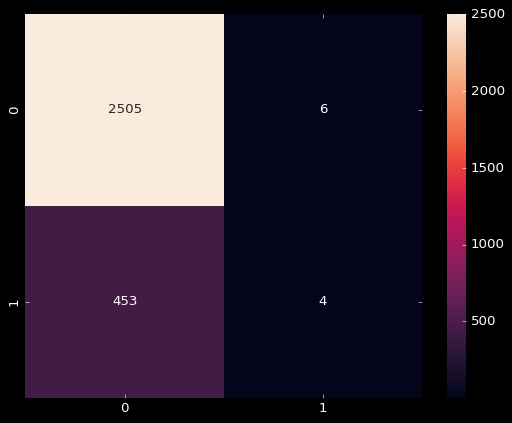

In [36]:
sns.heatmap(mat, annot = True, fmt=".5g")

In [37]:
class_report = metrics.classification_report(y_train, y_train_predict)

In [38]:
print(class_report)

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2511
           1       0.40      0.01      0.02       457

    accuracy                           0.85      2968
   macro avg       0.62      0.50      0.47      2968
weighted avg       0.78      0.85      0.78      2968



In [39]:
# Test data
model.score(x_test, y_test)

0.8522012578616353

In [40]:
y_test_prediction = model.predict(x_test)

<Axes: >

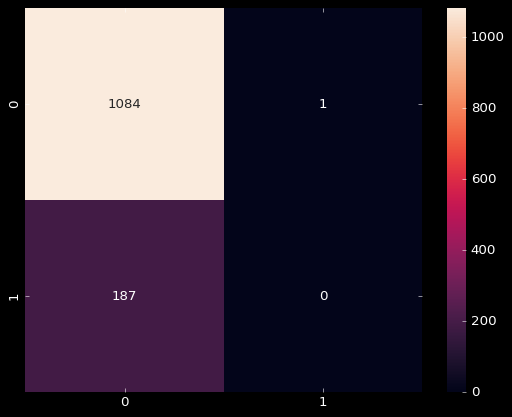

In [41]:
sns.heatmap(metrics.confusion_matrix(y_test, y_test_prediction), annot = True, fmt=".5g")

In [42]:
test_classification_report = metrics.classification_report(y_test, y_test_prediction)

In [43]:
print(test_classification_report)

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1085
           1       0.00      0.00      0.00       187

    accuracy                           0.85      1272
   macro avg       0.43      0.50      0.46      1272
weighted avg       0.73      0.85      0.78      1272



## AUC ROC Curve

### Key Components of the ROC Curve

1. **True Positive Rate (TPR)**:  
   Also called **Recall** or **Sensitivity**, it measures how well the model identifies positive instances.  
   Formula:  
   TPR = TP / (TP + FN)  

2. **False Positive Rate (FPR)**:  
   It measures the proportion of negative instances incorrectly classified as positive.  
   Formula:  
   FPR = FP / (FP + TN)  

3. **Threshold**:  
   The decision boundary used to classify an instance as positive or negative. By varying the threshold, we get different TPR and FPR values, which form the ROC curve.

4. **Diagonal Line**:  
   The diagonal line (from (0, 0) to (1, 1)) represents a random classifier. A model whose ROC curve is closer to this diagonal is no better than random guessing.

---

### How to Plot an ROC Curve

- **X-axis**: False Positive Rate (FPR).  
- **Y-axis**: True Positive Rate (TPR).  
- The curve is generated by varying the classification threshold and plotting the TPR against the FPR.

---

### Area Under the Curve (AUC)

The **Area Under the Curve (AUC)** is a single scalar value that quantifies the overall performance of the model:

- **AUC = 1**: Perfect classifier (always correct).  
- **AUC = 0.5**: Random guessing.  
- **AUC < 0.5**: Worse than random guessing (indicates a flawed model).

The closer the AUC is to 1, the better the model's performance.

---

### Interpretation of the ROC Curve

1. **Steep Curve**:  
   A steep curve that quickly reaches a high TPR with a low FPR indicates a highly effective model.

2. **Close to Diagonal**:  
   If the curve is close to the diagonal, the model has poor discrimination ability.

3. **Threshold Selection**:  
   The ROC curve helps identify an optimal threshold, balancing the trade-off between FPR and TPR based on the specific use case.

---

### Example of ROC Curve Points

Suppose we have a binary classification model, and the following confusion matrix values are calculated for various thresholds:

| Threshold | TPR   | FPR   |
|-----------|-------|-------|
| 0.9       | 0.2   | 0.1   |
| 0.7       | 0.6   | 0.2   |
| 0.5       | 0.8   | 0.3   |
| 0.3       | 0.9   | 0.5   |
| 0.1       | 1.0   | 0.7   |

By plotting these points, we can generate the ROC curve.

---

### Applications of the ROC Curve

1. **Model Evaluation**:  
   Used to compare different classification models and choose the best one.  

2. **Threshold Selection**:  
   Helps in selecting a threshold that balances sensitivity and specificity based on the application's requirements.

3. **Imbalanced Datasets**:  
   ROC curves are especially useful for imbalanced datasets where accuracy may be misleading.

---


In [44]:
# Plottting     
from sklearn.metrics import roc_curve, auc

y_pred_prob = model.predict_proba(x_test)[:, 1]
    
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

roc_auc = auc(fpr, tpr)

Here is a detailed explanation of the parameters you provided for Logistic Regression, along with their definitions and applications:

---

### **1. `penalty`**
- **Definition**: Specifies the type of regularization applied to the model to prevent overfitting.
- **Possible Values**:
  - `'l1'`: L1 regularization (Lasso) encourages sparsity by reducing some coefficients to 0.
  - `'l2'`: L2 regularization (Ridge) penalizes large coefficients.
  - `'elasticnet'`: Combination of L1 and L2 regularization.
  - `'none'`: No regularization.
- **Application**: Use L1 for feature selection, L2 for general regularization, and ElasticNet when you need a combination of both.

---

### **2. `dual`**
- **Definition**: Indicates whether to solve the dual optimization problem.
- **Possible Values**:
  - `True`: Use dual formulation.
  - `False`: Use primal formulation (default).
- **Application**: The dual formulation is useful when the number of samples (\( n \)) is less than the number of features (\( p \)).

---

### **3. `tol`**
- **Definition**: Tolerance for stopping criteria. Specifies the threshold for optimization convergence.
- **Default**: `0.0001`
- **Application**: Lower values make the optimization more precise but slower. Higher values can speed up training at the cost of accuracy.

---

### **4. `C`**
- **Definition**: Inverse of regularization strength. \( C = \frac{1}{\lambda} \), where \( \lambda \) is the regularization parameter.
- **Default**: `1.0`
- **Application**: Larger values of \( C \) reduce regularization, potentially leading to overfitting. Smaller values increase regularization, reducing overfitting but possibly underfitting the data.

---

### **5. `fit_intercept`**
- **Definition**: Specifies whether to include an intercept (bias term) in the model.
- **Default**: `True`
- **Application**: Set to `True` if you want to account for the baseline prediction when all features are zero. Set to `False` if the data is already centered.

---

### **6. `intercept_scaling`**
- **Definition**: Applies scaling to the intercept term when the solver is `'liblinear'` and `fit_intercept=True`.
- **Default**: `1`
- **Application**: Rarely used, but can help adjust the intercept when features are scaled.

---

### **7. `class_weight`**
- **Definition**: Weights associated with each class to handle imbalanced datasets.
- **Possible Values**:
  - `None`: Equal weight for all classes (default).
  - `'balanced'`: Adjusts weights inversely proportional to class frequencies.
  - Dictionary: Custom weights for each class.
- **Application**: Use `'balanced'` or a dictionary when working with highly imbalanced datasets.

---

### **8. `random_state`**
- **Definition**: Controls the randomness of algorithms that rely on random initialization (e.g., for solvers).
- **Default**: `None`
- **Application**: Set to a specific integer for reproducible results.

---

### **9. `solver`**
- **Definition**: Algorithm used for optimization.
- **Possible Values**:
  - `'newton-cg'`, `'lbfgs'`, `'liblinear'`, `'sag'`, `'saga'`
- **Default**: `'lbfgs'`
- **Application**:
  - `'liblinear'`: Small datasets or L1 regularization.
  - `'lbfgs'`, `'newton-cg'`: Large datasets and L2 regularization.
  - `'sag'`, `'saga'`: Very large datasets or elastic net regularization.

---

### **10. `max_iter`**
- **Definition**: Maximum number of iterations for the optimization algorithm.
- **Default**: `100`
- **Application**: Increase this value if the model fails to converge.

---

### **11. `multi_class`**
- **Definition**: Strategy for handling multi-class classification.
- **Possible Values**:
  - `'auto'`: Automatically chooses the best strategy based on the solver.
  - `'ovr'`: One-vs-Rest strategy.
  - `'multinomial'`: Uses the softmax function for multi-class probabilities.
- **Default**: `'deprecated'` (as of newer versions, use `'auto'` instead).
- **Application**: Use `'multinomial'` with solvers like `'lbfgs'` and `'saga'` for better multi-class performance.

---

### **12. `verbose`**
- **Definition**: Controls the verbosity of the output during fitting.
- **Default**: `0` (no output).
- **Application**: Increase to a positive integer (e.g., `1` or `2`) for detailed progress logs during training.

---

### **13. `warm_start`**
- **Definition**: Reuses the solution from the previous call to `fit` as the starting point for optimization.
- **Default**: `False`
- **Application**: Useful when training incrementally with additional data.

---

### **14. `n_jobs`**
- **Definition**: Number of CPU cores used for computation.
- **Possible Values**:
  - `None`: Uses a single core.
  - `-1`: Uses all available cores.
  - Positive Integer: Specifies the number of cores.
- **Application**: Set to `-1` for faster training, especially on large datasets.

---

### **15. `l1_ratio`**
- **Definition**: Ratio between L1 and L2 regularization when `penalty='elasticnet'`.
- **Possible Values**:
  - `None`: Not used unless `penalty='elasticnet'`.
  - Value between `0` and `1`:
    - `0`: Equivalent to L2 regularization.
    - `1`: Equivalent to L1 regularization.
    - Value in between: Mix of L1 and L2 regularization.
- **Application**: Use to tune the balance of regularization types for elastic net regularization.

---

### Summary of Applications:
- Use **`penalty`**, **`C`**, and **`l1_ratio`** for controlling regularization and overfitting.
- Adjust **`solver`** and **`max_iter`** for handling dataset size and convergence.
- Set **`class_weight`** for imbalanced datasets.
- Use **`random_state`** and **`warm_start`** for reproducibility and incremental training.

Would you like further examples or tuning tips for these parameters?

In [47]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4240 non-null   int32  
 1   age              4240 non-null   float64
 2   education        4240 non-null   float64
 3   currentSmoker    4240 non-null   float64
 4   cigsPerDay       4240 non-null   float64
 5   BP Meds          4240 non-null   float64
 6   prevalentStroke  4240 non-null   float64
 7   prevalentHyp     4240 non-null   float64
 8   diabetes         4240 non-null   float64
 9   tot cholesterol  4240 non-null   float64
 10  Systolic BP      4240 non-null   float64
 11  Diastolic BP     4240 non-null   float64
 12  BMI              4240 non-null   float64
 13  heartRate        4240 non-null   float64
 14  glucose          4240 non-null   float64
 15  Heart-Att        4240 non-null   int64  
dtypes: float64(14), int32(1), int64(1)
memory usage: 513.6 KB


In [53]:
# Hot encoding

categorical_col = ["BP Meds", "prevalentStroke", "prevalentHyp", "diabetes", "Gender", "education"]

In [54]:
data_encoded = pd.get_dummies(original_data, columns = categorical_col, drop_first = True)

In [55]:
data_encoded

age  currentSmoker  cigsPerDay  tot cholesterol  Systolic BP  \
0     39.0            0.0         0.0            195.0        106.0   
1     46.0            0.0         0.0            250.0        121.0   
2     48.0            1.0        20.0            245.0        127.5   
3     61.0            1.0        30.0            225.0        150.0   
4     46.0            1.0        23.0            285.0        130.0   
...    ...            ...         ...              ...          ...   
4235  48.0            1.0        20.0            248.0        131.0   
4236  44.0            1.0        15.0            210.0        126.5   
4237  52.0            0.0         0.0            269.0        133.5   
4238  40.0            0.0         0.0            185.0        141.0   
4239  39.0            1.0        30.0            196.0        133.0   

      Diastolic BP    BMI  heartRate     glucose  Heart-Att  BP Meds_1.0  \
0             70.0  26.97       80.0   77.000000          0        False   
1             81.0  28.73       95.0   76.000000          0        False   
2             80.0  25.34       75.0   70.000000          0        False   
3             95.0  28.58       65.0  103.000000          1        False   
4             84.0  23.10       85.0   85.000000          0        False   
...            ...    ...        ...         ...        ...          ...   
4235          72.0  22.00       84.0   86.000000          0        False   
4236          87.0  19.16       86.0   81.951936          0        False   
4237          83.0  21.47       80.0  104.500000          0        False   
4238          98.0  25.60       67.0   72.000000          0        False   
4239          86.0  20.91       85.0   80.000000          0        False   

      prevalentStroke_1.0  prevalentHyp_1.0  diabetes_1.0  Gender_1  \
0                   False             False         False     False   
1                   False             False         False      True   
2                   False             False         False     False   
3                   False              True         False      True   
4                   False             False         False      True   
...                   ...               ...           ...       ...   
4235                False             False         False      True   
4236                False             False         False      True   
4237                False             False         False      True   
4238                False              True         False     False   
4239                False             False         False      True   

      education_2.0  education_3.0  education_4.0  
0             False          False           True  
1              True          False          False  
2             False          False          False  
3             False           True          False  
4             False           True          False  
...             ...            ...            ...  
4235           True          False          False  
4236          False          False          False  
4237           True          False          False  
4238          False           True          False  
4239          False           True          False  

[4240 rows x 18 columns]

In [57]:
x = data_encoded.drop("Heart-Att", axis = 1)
y = data_encoded["Heart-Att"]

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 1) 

In [59]:
model.fit(x, y)

LogisticRegression()

In [67]:
from sklearn.metrics import roc_auc_score


0.8498427672955975
Axes(0.125,0.1;0.62x0.8)
              precision    recall  f1-score   support

           0       0.85      0.99      0.92      1085
           1       0.33      0.02      0.04       187

    accuracy                           0.85      1272
   macro avg       0.59      0.51      0.48      1272
weighted avg       0.78      0.85      0.79      1272



(None, None, None, 0.7100766406269252)

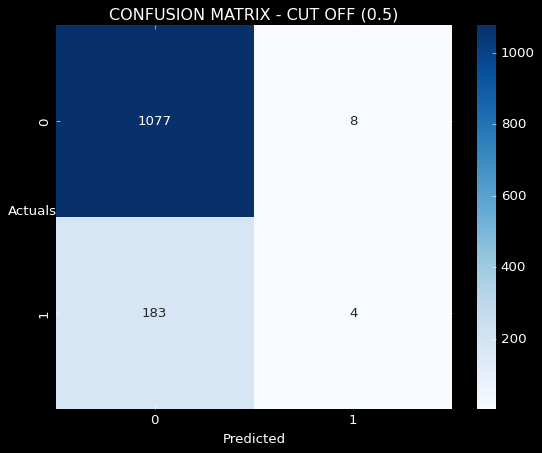

In [75]:
evaluate_model(model, x_test, y_test)

In [73]:
from sklearn.metrics import roc_auc_score


def evaluate_model(model, x, y):
    y_predict = model.predict(x)

    Acc_test = print(model.score(x,y))

    CM_test = print(sns.heatmap((metrics.confusion_matrix(y, y_predict)),annot=True,fmt='.5g'
                ,cmap='Blues'));
    plt.xlabel('Predicted');
    plt.ylabel('Actuals',rotation=0);
    plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

    CR_test = print(metrics.classification_report(y,y_predict))

    probs = model.predict_proba(x)
    probs = probs[:, 1]
    auc_test = roc_auc_score(y, probs)
    
    return Acc_test,CM_test,CR_test,auc_test 

0.8473719676549866
Axes(0.125,0.1;0.62x0.8)
              precision    recall  f1-score   support

           0       0.85      0.99      0.92      2511
           1       0.56      0.04      0.07       457

    accuracy                           0.85      2968
   macro avg       0.71      0.52      0.50      2968
weighted avg       0.81      0.85      0.79      2968



(None, None, None, 0.6872666176917841)

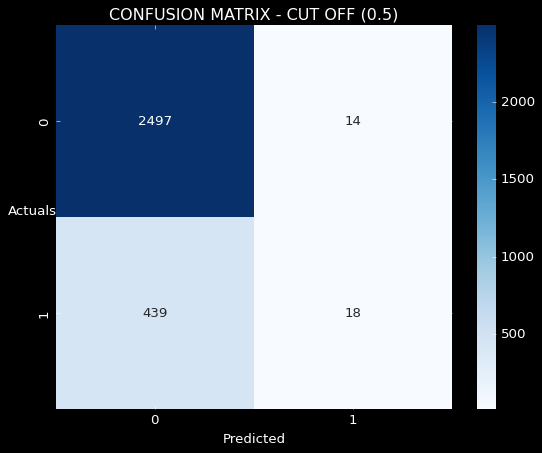

In [74]:
evaluate_model(model, x_train, y_train)

In [70]:
modelDT = DecisionTreeClassifier()

In [76]:
modelDT.fit(x_train, y_train)

DecisionTreeClassifier()

1.0
Axes(0.125,0.1;0.62x0.8)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2511
           1       1.00      1.00      1.00       457

    accuracy                           1.00      2968
   macro avg       1.00      1.00      1.00      2968
weighted avg       1.00      1.00      1.00      2968



(None, None, None, 1.0)

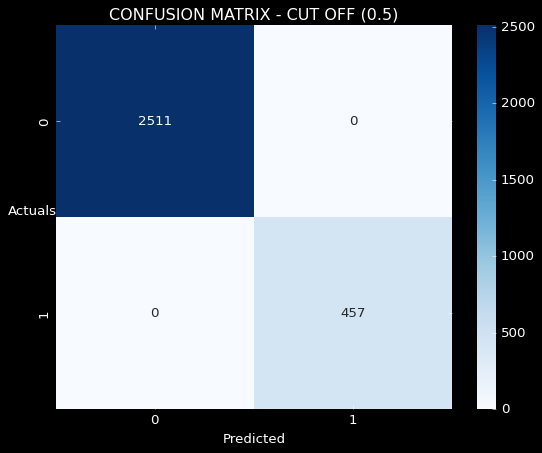

In [77]:
evaluate_model(modelDT, x_train, y_train)